In [274]:
import math

# defining standard variables
rocket_fuel_mass = 600
rover_mass = 1.36 * (10 ** 3)
mars_mass = 6.39 * (10 ** 23)
mars_radius = 3390000
velocity = 4650
altitude = 1500000
vertical_distance = 1500000
horizontal_distance = 0
G = 6.67 * (10 ** -11)
rover_angle = 54
deviation_angle = 0
altitude_list = []
velocity_list = []
acceleration_list = [] 
gravity_list = []
drag_list = []

# defining a function that calculates altitude, velocity and acceleration for each second
def frame(surface_area, rocket=False):
    
    global velocity
    global altitude
    global rover_angle
    global deviation_angle
    global vertical_distance
    global horizontal_distance
    global rocket_fuel_mass
    
    # last_velocity is used to calculate change in velocity, or acceleration
    last_velocity = velocity
    
    total_mass = rover_mass + rocket_fuel_mass
    
    # Newton's law of gravitation, and Newton's second law
    gravitational_force = (G * total_mass * mars_mass) / ((altitude + mars_radius) ** 2)
    gravitational_acceleration = gravitational_force / total_mass

    drag = 0.01 * surface_area * (math.e ** (-altitude / 11100)) * (velocity ** 2)
   
    velocity -= drag / total_mass
    
    # rover is decelerated if rocket is active and there is fuel available hello
    if rocket == True and rocket_fuel_mass > 0:
        
        velocity -= 6000 / total_mass
        rocket_fuel_mass -= 2 * (10 ** -4) * 6000
    
    # calculates velocities using simple trig, the angle of the rover with the normal and the angle of deviation from the centre of Mars
    vertical_velocity = velocity * math.cos(math.radians(rover_angle)) + gravitational_acceleration * math.cos(math.radians(deviation_angle))
    horizontal_velocity = velocity * math.sin(math.radians(rover_angle)) - gravitational_acceleration * math.sin(math.radians(deviation_angle))
    vertical_distance -= vertical_velocity
    horizontal_distance += horizontal_velocity
    
    # redefines the two angles based on the newly calculated values
    rover_angle = math.degrees(math.atan(horizontal_velocity / vertical_velocity))
    deviation_angle = math.degrees(math.atan(horizontal_distance / (mars_radius + vertical_distance)))
    
    altitude = math.sqrt((horizontal_distance ** 2) + (vertical_distance + mars_radius) ** 2) - mars_radius
    velocity = math.sqrt(horizontal_velocity ** 2 + vertical_velocity ** 2)
    acceleration = velocity - last_velocity
    
    velocity_list.append(velocity)
    altitude_list.append(altitude)
    acceleration_list.append(acceleration)

while altitude > 9000:
    
    frame(35)

# parachute is deployed at altitude of 9000m
while altitude > 3000:
    
    frame(600)
    
# rocket is activated at altitude 3000m
while altitude > 0:
    
    frame(600, rocket=True)
    
# checks to see whether the model has satisfied the objectives given
print("Final velocity:", velocity_list[-1])
print("Max deceleration:", min(acceleration_list))
    
    
    
    




Final velocity: 7.540203032654785
Max deceleration: -96.27455774252067


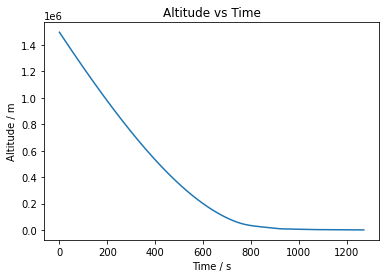

In [284]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

X_axis = np.arange(len(altitude_list))
Y_axis = altitude_list

fig, ax1 = plt.subplots(1)

ax1.plot(X_axis, Y_axis)
ax1.set_title("Altitude vs Time")
ax1.set_xlabel("Time / s")
ax1.set_ylabel("Altitude / m")
plt.show()

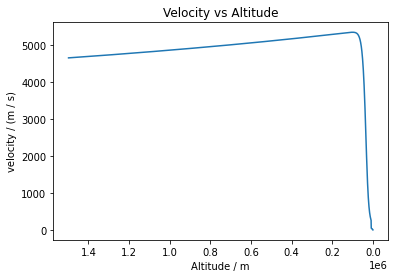

In [286]:
X_axis = altitude_list
Y_axis = velocity_list

fig, ax2 = plt.subplots(1)

ax2.plot(X_axis, Y_axis)
ax2.set_title("Velocity vs Altitude")
ax2.set_xlabel("Altitude / m")
ax2.set_ylabel("velocity / (m / s)")
ax2.invert_xaxis()
plt.show()

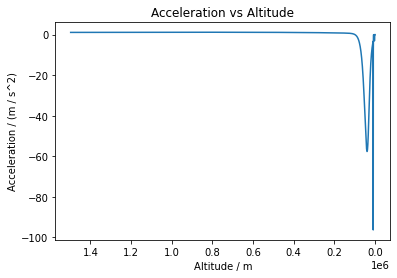

In [287]:
X_axis = altitude_list
Y_axis = acceleration_list

fig, ax3 = plt.subplots(1)
ax3.plot(X_axis, Y_axis)
ax3.set_title("Acceleration vs Altitude")
ax3.set_xlabel("Altitude / m")
ax3.set_ylabel("Acceleration / (m / s^2)")
ax3.invert_xaxis()
plt.show()